# THE SPARKS FOUNDATION

## Data Science and Business Analysis Internship-- GRIP September 2023

### Author: Tahleel Rashid Shah

### Task 1: Prediction using Supervised Machine Learning

### Problem Statement: Predict the percentage of a Student based on the Number of Hours studied.

### Dataset: http://bit.ly/w-data


### Importing all libraries required in this notebook

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
#reading the csv file 
df=pd.read_csv('C:\\Users\\Tahleel Rashid\\Downloads\\SCORE.csv')

In [4]:
#printing the first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# count of missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


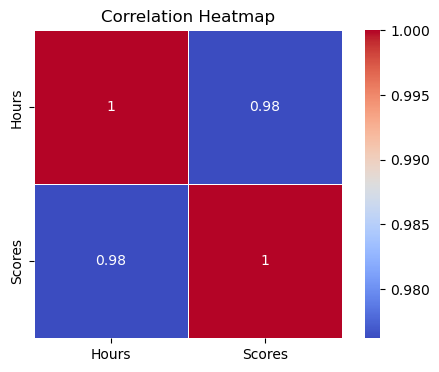

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', linewidths=.5, square=True)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:title={'center':'Hours-Studied vs Percentage-Scores'}, xlabel='Hours', ylabel='Scores'>

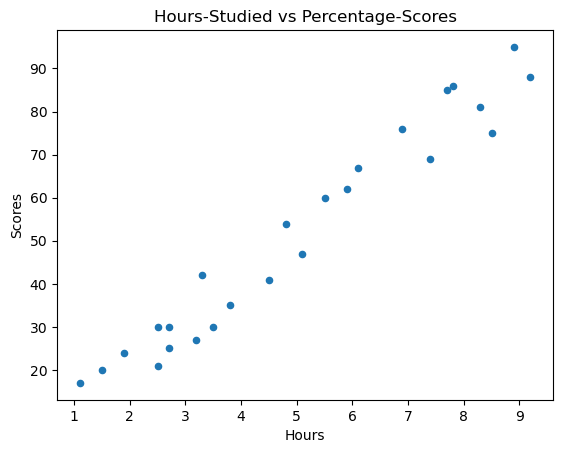

In [12]:
df.plot.scatter(x='Hours', y='Scores', title='Hours-Studied vs Percentage-Scores')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score and also there is strong correlation.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [28]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


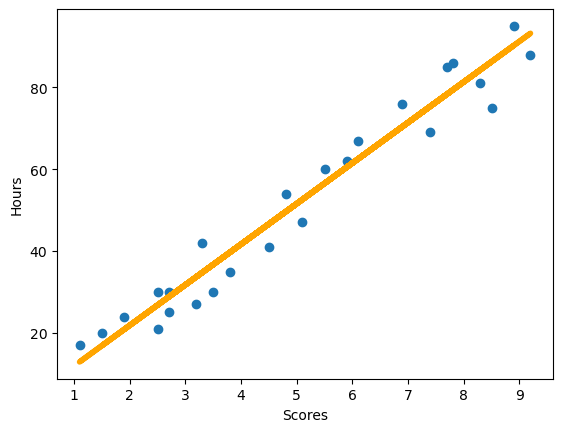

In [32]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, label ='regression line', color='orange', linewidth=4);
plt.xlabel('Scores', fontsize = 10)
plt.ylabel('Hours', fontsize = 10)
plt.show()

### Check the accuracy scores for training and test set

In [33]:
print('Test Score: ')
print(regressor.score(X_test, y_test))
print('Training Score: ')
print(regressor.score(X_train, y_train))

Test Score: 
0.9454906892105356
Training Score: 
0.9515510725211552


In [34]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [35]:
print(X_test) # Testing data - In Hours


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Plotting to see the difference between the actual and predicted and actual values

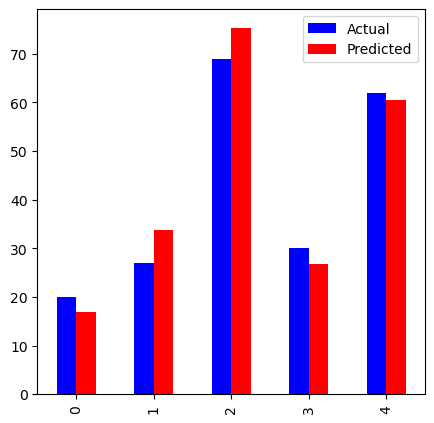

In [29]:
df.plot(kind= 'bar', figsize=(5,5), color=['blue', 'red'])
plt.show()

### **Making prediction**
Testing the model with our own data

In [37]:
hours = 10
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 10
Predicted Score = 101.12472484785705


### **Model Evaluation Metrics**


In [38]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
